# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Lebenszufriedenheit verschiedener Länder
### 1.2 Fragestellung:
- Wie unterscheidet sich die Lebenszufriedenheit zwischen verschiedenen Ländern? 
- Gibt es einen Zusammenhang zwischen dem Einkommen eines Landes und der Lebenszufriedenheit?   
### 1.3 Datenquelle:
- https://ourworldindata.org/grapher/happiness-cantril-ladder?country=OWID_WRL~OWID_EUR~OWID_ASI~OWID_AFR




### 1.4 Daten beschaffen und laden

In [28]:

import pandas as pd
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 39.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [16]:
df = pd.read_csv("happiness-cantril-ladder.csv", skiprows=1,
                 names= ["Entity", "Code", "Year", "Cantril_ladder_score"])
df.head()



,Entity,Code,Year,Cantril_ladder_score
0,Afghanistan,AFG,2011,4.258
1,Afghanistan,AFG,2012,4.040
2,Afghanistan,AFG,2014,3.575
3,Afghanistan,AFG,2015,3.360
4,Afghanistan,AFG,2016,3.794


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge.

In [17]:
df_pivot = df.pivot(index='Entity', columns='Year', values='Cantril_ladder_score')
df_pivot.head()

Year,2011,2012,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Entity,,,,,,,,,,,,,
Afghanistan,4.258000,4.040000,3.575000,3.360000,3.79400,3.632000,3.203000,2.566900,2.523000,2.404000,1.859000,1.721000,1.36400
Africa,4.453846,4.618466,4.476437,4.397037,4.46021,4.449756,4.517125,4.463035,4.553698,4.519978,4.428142,4.386864,4.39082
Albania,5.134000,5.550000,4.959000,4.655000,4.64400,4.586000,4.719000,4.882700,5.117000,5.199000,5.277000,5.304000,5.41100
Algeria,5.368000,5.422000,5.605000,6.355000,5.87200,5.295000,5.211000,5.005100,4.887000,5.122000,5.329000,5.364000,5.57100
Angola,4.178000,5.589000,4.033000,3.866000,3.79500,3.795000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

In [18]:
df.dtypes

Entity                   object
Code                     object
Year                      int64
Cantril_ladder_score    float64
dtype: object

In [19]:
print('Anzahl verschiedener Gebiete: ', len(df['Entity'].unique()))

Anzahl verschiedener Gebiete:  178


In [20]:
df['Entity'].value_counts()

Entity
Afghanistan    13
Niger          13
Montenegro     13
Morocco        13
Myanmar        13
               ..
Oman            3
Puerto Rico     2
Maldives        2
Guyana          1
Cuba            1
Name: count, Length: 178, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

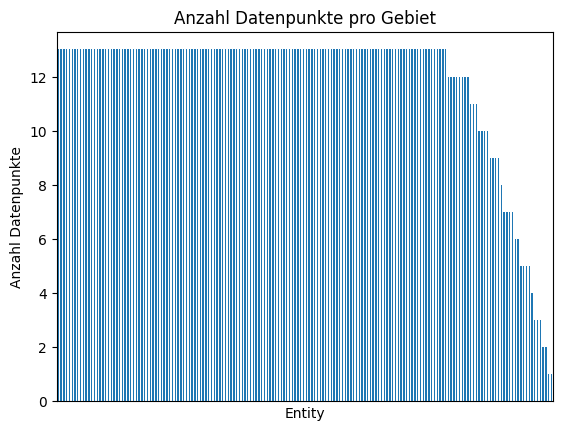

In [29]:
df['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],    
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

